In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import datetime as datetime
import nltk
import seaborn
import csv
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from subprocess import check_output
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Decision tree model based on Daily Growth and title_score1 abs_score1

In [4]:
df_combine = pd.read_csv('df_combine.csv')
X1 = df_combine[['title_score1']]
X1_train = X1[0:356]
X1_test = X1[357:]
X2 = df_combine[['abs_score1']]
X2_train = X2[0:356]
X2_test = X2[357:]
Y = df_combine[['Daily Growth']]
Y_train = Y[0:356]
Y_test = Y[357:]

Training score:0.923408
Test score:-0.448644


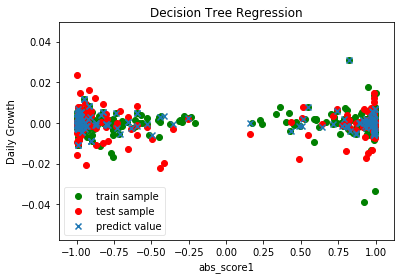

In [52]:
SPX = df_combine[['Attributes','Adj Close']]
tree = DecisionTreeRegressor().fit(X1_train, Y_train)
score = tree.score(X1_test, Y_test)
print ("Training score:%f"%(tree.score(X1_train,Y_train)))
print ("Test score:%f"%(tree.score(X1_test,Y_test)))

# Returns the coefficient of determination R^2 of the prediction. ... 
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
X = np.arange(-1.0, 1.0, 0.01)[:, np.newaxis]
Y = tree.predict(X1_test)
ax.scatter(X1_train,Y_train,label="train sample",c='g')
ax.scatter(X1_test,Y_test,label="test sample",c='r')
ax.scatter(X1_test,Y,label="predict value", marker='x')
ax.set_xlabel("abs_score1")
ax.set_ylabel("Daily Growth")
ax.set_title("Decision Tree Regression")
ax.legend(framealpha=0.5)
plt.show()

# The result shows that although the model fits our training data well, it can not be applied to the test data. It is overfitting.

Training score:0.365120
Test score:-0.032908


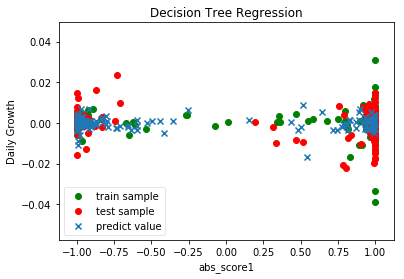

In [53]:
SPX = df_combine[['Attributes','Adj Close']]
tree = DecisionTreeRegressor().fit(X2_train, Y_train)
score = tree.score(X2_test, Y_test)
print ("Training score:%f"%(tree.score(X2_train,Y_train)))
print ("Test score:%f"%(tree.score(X2_test,Y_test)))
# Returns the coefficient of determination R^2 of the prediction. ... 
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
X = np.arange(-1.0, 1.0, 0.01)[:, np.newaxis]
Y = tree.predict(X2_test)
ax.scatter(X2_train,Y_train,label="train sample",c='g')
ax.scatter(X2_test,Y_test,label="test sample",c='r')
ax.scatter(X1_test,Y,label="predict value", marker='x')
ax.set_xlabel("abs_score1")
ax.set_ylabel("Daily Growth")
ax.set_title("Decision Tree Regression")
ax.legend(framealpha=0.5)
plt.show()

# The result shows that although the model fits our training data well, it can not be applied to the test data. It is overfitting.

### Decision tree model related to different sentiment score and LabeledY2

In [13]:
# read different sentiment scores
news_scores = pd.read_csv('News_score.csv')
news_scores

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabeledY1,LabeledY2,title_score1,abs_score1,title_score2,abs_score2,title_polarity,title_subjectivity,abs_polarity,abs_subjectivity
0,0,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1,-1,0.9508,0.9990,0.3612,0.9952,0.070004,0.396425,0.041043,0.413740
1,1,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1,1,0.9881,0.9976,-0.9761,-0.9717,0.010467,0.412125,0.017999,0.435100
2,2,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0,1,-0.9888,0.9942,-0.9806,0.7184,0.061586,0.368534,0.050819,0.481116
3,3,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1,-1,0.9911,0.9987,0.6249,0.9856,0.009768,0.415676,0.025399,0.419600
4,4,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0,1,-0.8984,0.9958,-0.9623,0.9417,0.081814,0.429716,0.054197,0.412035
5,5,2016-10-03,2164.409912,2154.770020,2164.330078,2161.199951,3137550000,2161.199951,-0.001446,0,0,-0.9835,0.9949,-0.9926,-0.9843,0.041357,0.350482,0.037696,0.396029
6,6,2016-10-04,2165.459961,2144.010010,2163.370117,2150.489990,3750890000,2150.489990,-0.005954,-1,-1,0.9782,-0.6473,0.9379,-0.9955,0.072068,0.377090,0.036085,0.420215
7,7,2016-10-05,2163.949951,2155.149902,2155.149902,2159.729980,3906550000,2159.729980,0.002125,0,0,-0.7556,0.9986,-0.9794,0.6486,-0.006672,0.331287,0.021652,0.454649
8,8,2016-10-06,2162.929932,2150.280029,2158.219971,2160.770020,3461550000,2160.770020,0.001182,0,0,-0.9891,0.9768,-0.9879,-0.9882,0.069386,0.373315,0.013940,0.413580
9,9,2016-10-07,2165.860107,2144.850098,2164.189941,2153.739990,3619890000,2153.739990,-0.004829,0,-1,0.8677,0.9935,0.8316,-0.1851,0.072813,0.373992,0.060094,0.455539


Training score:0.887294
Test score:-0.781763


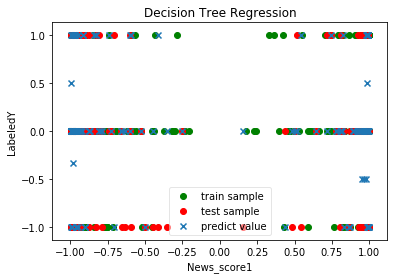

In [54]:
# Use News_score1 and LabeledY to build decision tree model
X_1 = news_scores[['title_score1']]
X_train_1 = X_1[0:356]
X_test_1 = X_1[357:]
Y_1 = news_scores[['LabeledY2']]
Y_train_1 = Y_1[0:356]
Y_test_1 = Y_1[357:]

tree_1 = DecisionTreeRegressor().fit(X_train_1, Y_train_1)
print ("Training score:%f"%(tree_1.score(X_train_1,Y_train_1)))
print ("Test score:%f"%(tree_1.score(X_test_1,Y_test_1)))

#Returns the coefficient of determination R^2 of the prediction. ... 
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
X = np.arange(-1.0, 1.0, 0.01)[:, np.newaxis]
Y = tree_1.predict(X_test_1)
ax.scatter(X_train_1,Y_train_1,label="train sample",c='g')
ax.scatter(X_test_1,Y_test_1,label="test sample",c='r')
ax.scatter(X1_test,Y,label="predict value", marker='x')
ax.set_xlabel("News_score1")
ax.set_ylabel("LabeledY")
ax.set_title("Decision Tree Regression")
ax.legend(framealpha=0.5)
plt.show()

# The result shows that although the model fits our training data well, it can not be applied to the test data. It is overfitting.

Training score:0.814662
Test score:-0.736746


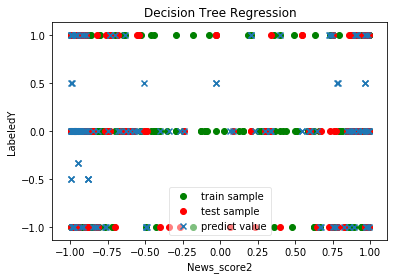

In [55]:
# Use News_score2 and LabeledY to build decision tree model
X_2 = news_scores[['title_score2']]
X_train_2 = X_2[0:356]
X_test_2 = X_2[357:]
Y_2 = news_scores[['LabeledY2']]
Y_train_2 = Y_2[0:356]
Y_test_2 = Y_2[357:]

tree_2 = DecisionTreeRegressor().fit(X_train_2, Y_train_2)
print ("Training score:%f"%(tree_2.score(X_train_2,Y_train_2)))
print ("Test score:%f"%(tree_2.score(X_test_2,Y_test_2)))
#Returns the coefficient of determination R^2 of the prediction. ... 
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
X = np.arange(-1, 1, 0.01)[:, np.newaxis]
Y = tree_2.predict(X_test_2)
ax.scatter(X_train_2,Y_train_2,label="train sample",c='g')
ax.scatter(X_test_2,Y_test_2,label="test sample",c='r')
ax.scatter(X_test_2,Y,label="predict value", marker='x')
ax.set_xlabel("News_score2")
ax.set_ylabel("LabeledY")
ax.set_title("Decision Tree Regression")
ax.legend(framealpha=0.5)
plt.show()

# The result shows that although the model fits our training data well, it can not be applied to the test data. It is overfitting.

In [44]:
# Use title_polarity, title_subjectivity, abs_polarity, abs_subjectivity and LabeledY to build decision tree model
X_3 = news_scores[['title_polarity','title_subjectivity','abs_polarity','abs_subjectivity']]
X_train_3 = X_3[0:356]
X_test_3 = X_3[357:]
Y_3 = news_scores[['LabeledY2']]
Y_train_3 = Y_3[0:356]
Y_test_3 = Y_3[357:]

tree_3 = DecisionTreeRegressor().fit(X_train_3, Y_train_3)
print ("Training score:%f"%(tree_3.score(X_train_3,Y_train_3)))
print ("Test score:%f"%(tree_3.score(X_test_3,Y_test_3)))
#Returns the coefficient of determination R^2 of the prediction. ... 
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

# The result shows that although the model fits our training data well, it can not be applied to the test data. It is overfitting.

Training score:1.000000
Test score:-1.065951
